LSTM Stock Price Predictor - Jupyter Notebook 


LSTM (Long Short-term Memory) is a type of RNN(Recurrent Neural Network) well suited for processing sequential data and capturing long term dependencies

In [11]:
# Step 1: Install and Import Libraries
!pip install yfinance tensorflow scikit-learn matplotlib seaborn

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Step 2: Download Stock Data
ticker = 'RELIANCE.NS'
data = yf.download(ticker, start='2015-01-01', end='2025-07-31')
data = data[['Close']]
data.dropna(inplace=True)
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_28356\2623008297.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,RELIANCE.NS
Date,
2015-01-01,190.758636
2015-01-02,190.253769
2015-01-05,188.169800
2015-01-06,179.629807
2015-01-07,183.539948


In [13]:
# Step 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [14]:
# Step 4: Create Sequences (60 timesteps)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]

In [15]:
# Step 5: Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [16]:
# Step 6: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0487 - val_loss: 0.0012
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0020 - val_loss: 8.9682e-04
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0018 - val_loss: 9.6915e-04
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0016 - val_loss: 7.9267e-04
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0014 - val_loss: 8.0717e-04
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/

In [18]:
# Step 8: Predict on Test Set
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


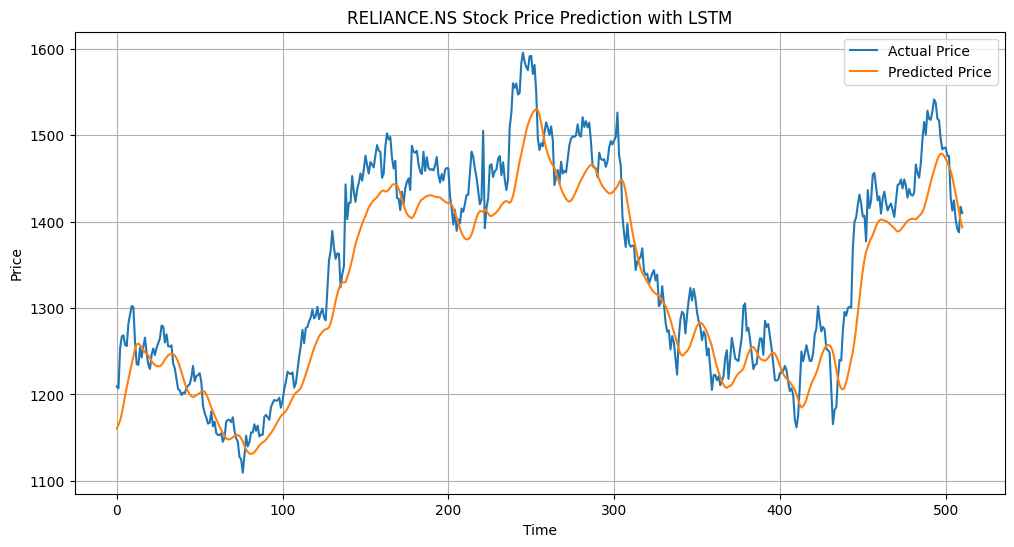

In [19]:
# Step 9: Plot Results
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [20]:
# Step 10: Evaluate
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f'RMSE: {rmse:.2f}')

RMSE: 44.50
